# Curso: Previsões de série temporal: COVID-19

## Objetivos:
* Analise séries temporais
* Defina os parâmetros do modelo preditivo ARIMA
* Entenda os conceitos de tendência, sazonalidade, erro e ciclicidade
* Entenda os conceitos de autocorrelação

Link: https://cursos.alura.com.br/course/previsoes-serie-temporal-covid-19

## Importando as bibliotecas

In [43]:
from datetime import date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

## Carregando a base de dados

In [87]:
df = pd.read_csv('datasets/cases-brazil-states.csv')
df['data'] = pd.to_datetime(df['data']).dt.date
df.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN


## Explorando os dados

In [88]:
df_sp = df[df['estado'] == 'SP']
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [89]:
df_sp.index = pd.to_datetime(df_sp.data)

## Decomposição dos dados

Filtrar os dados para os estados de interesse e decompor nossa série temporal em componentes.

In [90]:
resultados = seasonal_decompose(df_sp.novosObitos, period=7)

In [91]:
def plotar_grafico(y1, y2, y3, c1, c2, c3, label1, label2, label3):
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(y1, color=c1, label=label1)
    ax.plot(y2, color=c2, label=label2)
    ax.plot(y3, color=c3, label=label3)
    plt.legend(fontsize=14)
    plt.show()

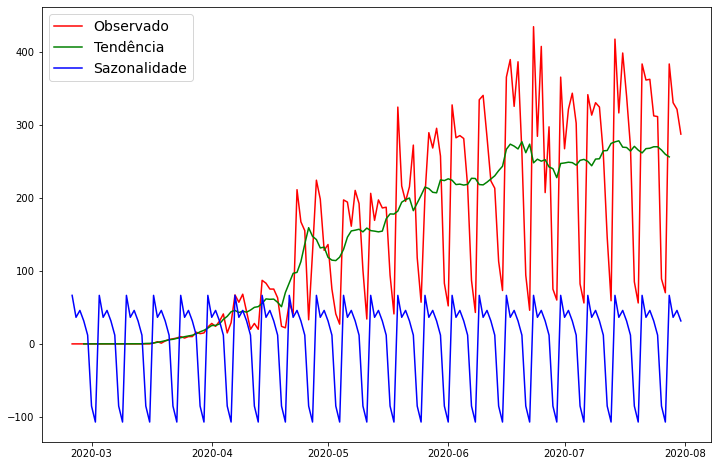

In [92]:
plotar_grafico(resultados.observed, resultados.trend, resultados.seasonal, 'red', 'green', 'blue', 'Observado', 'Tendência', 'Sazonalidade')

In [95]:
df_mg = df[df['estado'] == 'MG']
df_rj = df[df['estado'] == 'RJ']

df_mg.index = pd.to_datetime(df_mg.data)
df_rj.index = pd.to_datetime(df_rj.data)


resultados_mg = seasonal_decompose(df_mg.novosObitos, period=7)
resultados_sp = seasonal_decompose(df_rj.novosObitos, period=7)

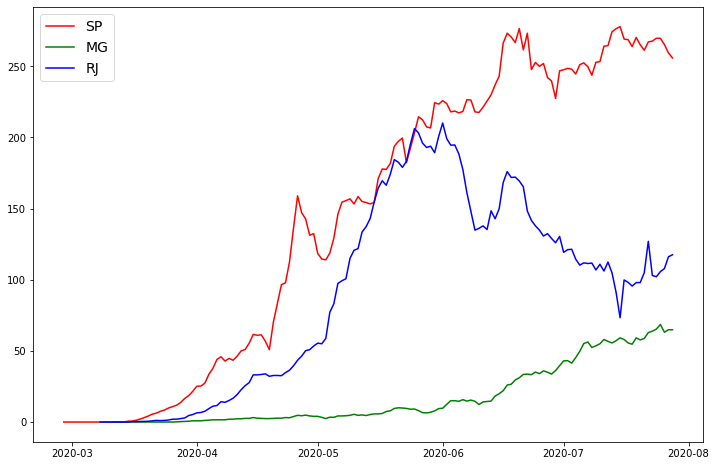

In [96]:
plotar_grafico(resultados.trend, resultados_mg.trend, resultados_sp.trend, 'red', 'green', 'blue', 'SP', 'MG', 'RJ')

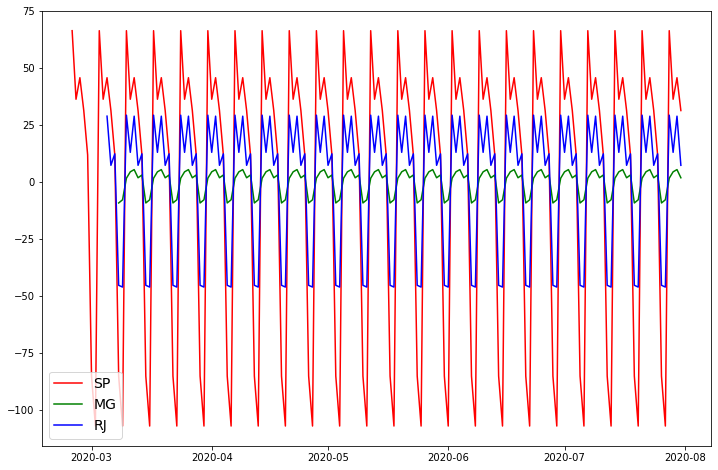

In [97]:
plotar_grafico(resultados.seasonal, resultados_mg.seasonal, resultados_sp.seasonal, 'red', 'green', 'blue', 'SP', 'MG', 'RJ')

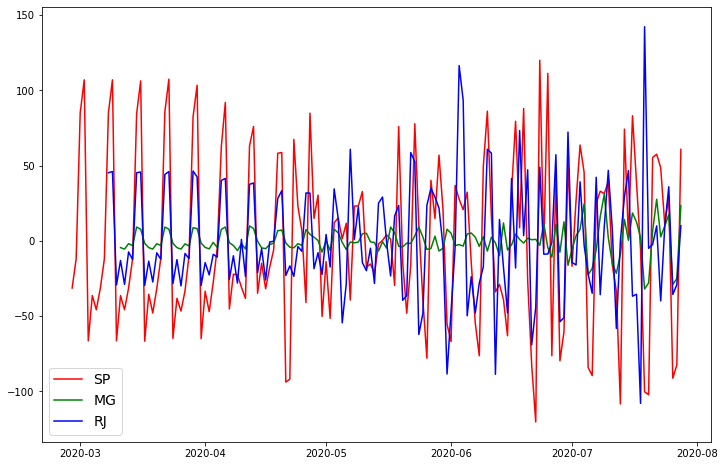

In [98]:
plotar_grafico(resultados.resid, resultados_mg.resid, resultados_sp.resid, 'red', 'green', 'blue', 'SP', 'MG', 'RJ')